# Linear Regression

# Part 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

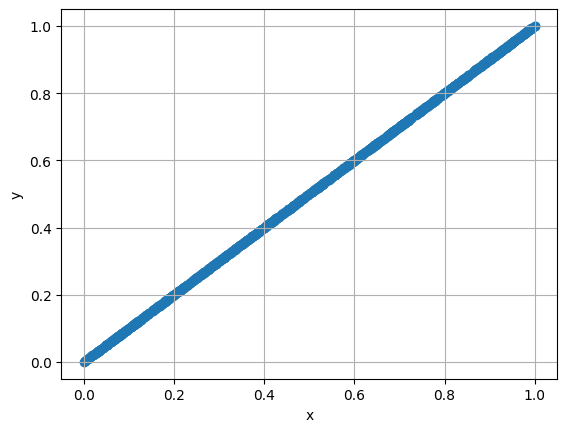

In [11]:
num_ex = 1000

x= np.random.rand(num_examples)
y = x
w = 2
b = 1

std = 1.0
mean = 0
noise = np.random.normal(mean, std, num_ex)
y - (w*x + b)


#Scatter Plot 
plt.scatter(x,y,marker="o")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [29]:
def sample_data(x, w=2, b=1, std=1):
    y = x
    mean = 0
    num_ex = len(x)
    noise = np.random.normal(mean, std, num_ex)
    o = y - (w*x + b)
    return o

# Part 2

In [21]:
def loop(x, w, b):
    num_examples = len(x)
    y = np.zeros(num_examples)
    for i in range(num_examples):
        y[i] = w * x[i] + b
    
    return y

In [25]:
def npm(x,w,b):
    y = w*x+b 
    return y 

In [26]:
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
w = 2.0
b = 1.0
loopm = loop(x, w, b)
npm = npm(x, w, b)

print("loopm Results:", loopm)
print("npm Results:", npm)
o = np.allclose(loopm, npm)
print("As you can see the results are identical")

loopm Results: [ 3.  5.  7.  9. 11.]
npm Results: [ 3.  5.  7.  9. 11.]
As you can see the results are identical


# Part 3

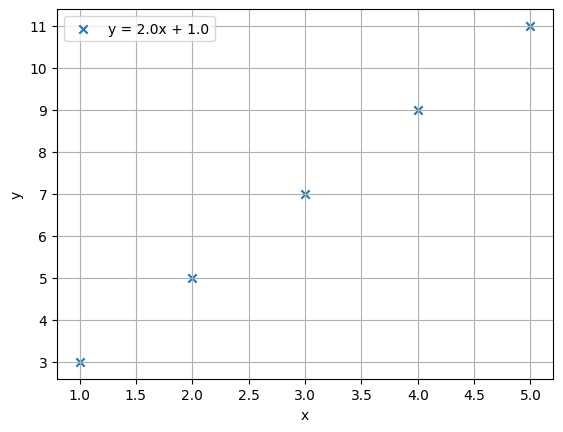

In [27]:
y = model_np(x,w,b)
plt.scatter(x, y, marker='x', label='y = {}x + {}'.format(w, b))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

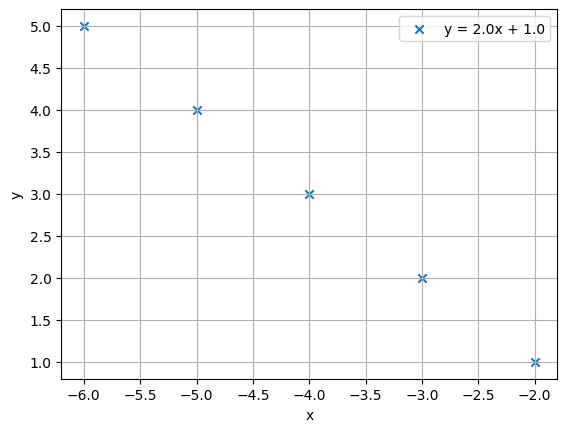

In [31]:
x= np.array([1,2,3,4,5])
y= sample_data(x)
plt.scatter(y, x, marker='x', label='y = {}x + {}'.format(w, b))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Part 4

In [43]:
#Sample Data
x = np.array([1,2,3,4,5])
w_true = 2
b_true = 1
y_true = w_true*x+b_true

In [44]:
def cost(x,y,w,b):
    y_pred = w * x + b
    mse = (np.square(y - y_pred)).mean()
    return mse
wv = np.linspace(0,4,100)
bv = np.linspace(-1,3,100)

costw = [cost(x,y_true,w,b_true) for w in wv]
costb = [cost(x,y_true,w_true,b) for b in bv]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cost vs. weight


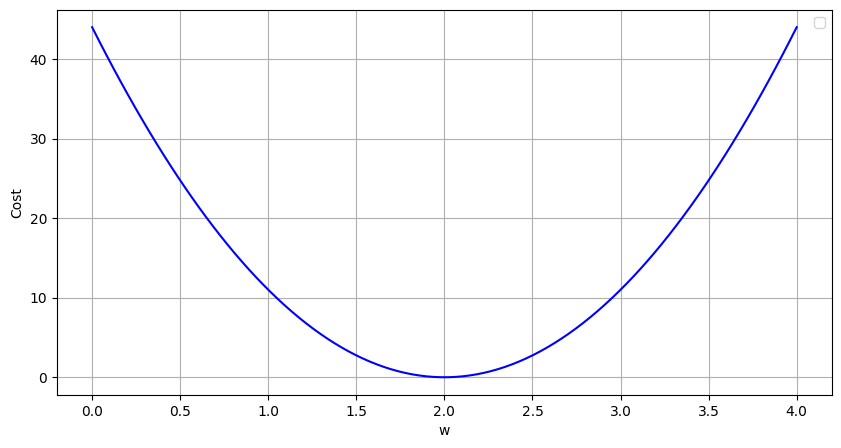

In [45]:
print('Cost vs. weight')
plt.figure(figsize=(10, 5))
plt.plot(wv, costw, color='blue')
plt.xlabel('w')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


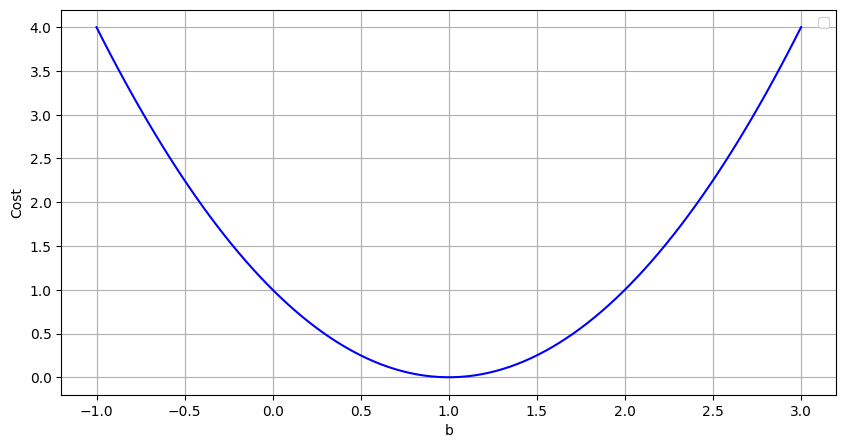

In [46]:
# Plot the cost vs. b (keeping w constant)
plt.figure(figsize=(10, 5))
plt.plot(bv, costb, color='blue')
plt.xlabel('b')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()

# Part 5

In [41]:
def gradient(x,y,w,b):  
    y_pred = w * x + b
    dw = -2 * np.mean((y - y_pred) * x)
    db = -2 * np.mean(y - y_pred)
    return dw,db

In [47]:
wv= np.linspace(0,4,100)
bv = np.linspace(-1,3,100)

#Gradient Functions w/ respect to w and b 
dwv = [gradient(x,y_true,w,b_true) for w in wv]
dbv = [gradient(x,y_true,w_true,b) for b in bv]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gradient vs. w


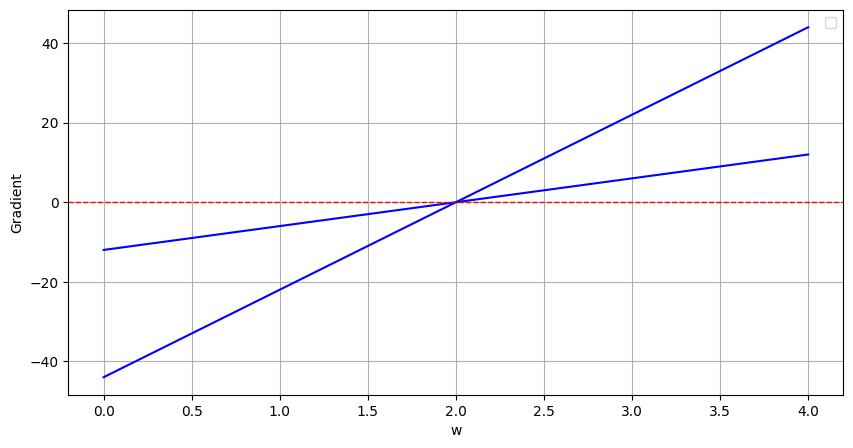

In [50]:
print('Gradient vs. w')
plt.figure(figsize=(10, 5))
plt.plot(wv, dwv, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('w')
plt.ylabel('Gradient')
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gradient vs. b


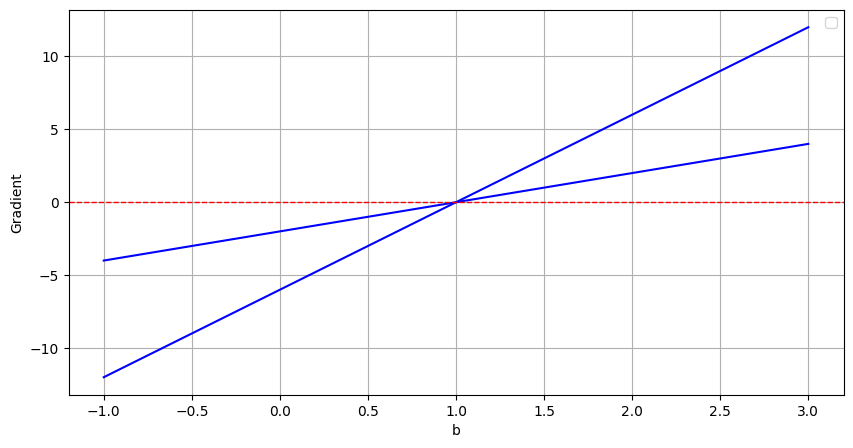

In [51]:
print('Gradient vs. b')
plt.figure(figsize=(10, 5))
plt.plot(bv, dbv, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('b')
plt.ylabel('Gradient')
plt.grid(True)
plt.legend()
plt.show()

In [52]:

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b) 

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 


In [54]:
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = 2.0 * x + 1.0 
w_in = 0.5 
b_in = 0.0
alpha = 0.01 
num_iterations = 100000 

final_w, final_b, cost_history, param_history = gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost, gradient)

Iteration    0: Cost 2.03e+01  dj_dw: -3.900e+01, dj_db: -1.100e+01   w:  8.900e-01, b: 1.10000e-01
Iteration 10000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 20000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 30000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 40000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 50000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 60000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 70000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 80000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 90000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.0

# Part 7

In [61]:
y = 2.0 * x + 1.0
w_in = 0.5 
b_in = 0.0 
alpha = 0.01
num_iterations = 100000 


final_w, final_b, cost_history, param_history = gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost, gradient)

Iteration    0: Cost 2.03e+01  dj_dw: -3.900e+01, dj_db: -1.100e+01   w:  8.900e-01, b: 1.10000e-01
Iteration 10000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 20000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 30000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 40000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 50000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 60000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 70000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 80000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 90000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.0

Cost vs. Iteration


Text(0, 0.5, 'Cost')

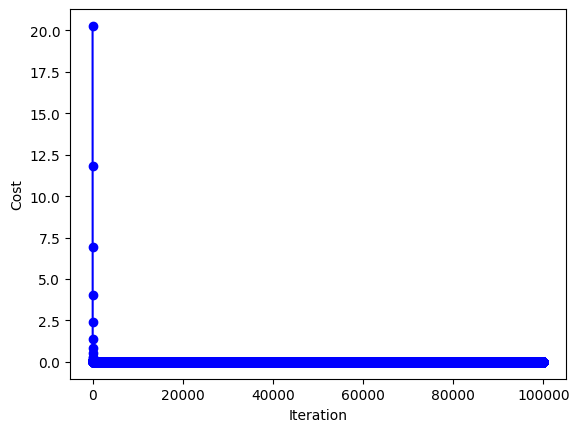

In [62]:
print('Cost vs. Iteration')
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')